In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [121]:
 train= pd.read_csv('train.csv')

In [122]:
 test= pd.read_csv('test.csv')

In [123]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [124]:
train.shape

(59381, 128)

In [125]:
test.shape

(19765, 127)

In [126]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [127]:
train.isnull().sum()[train.isnull().sum() != 0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

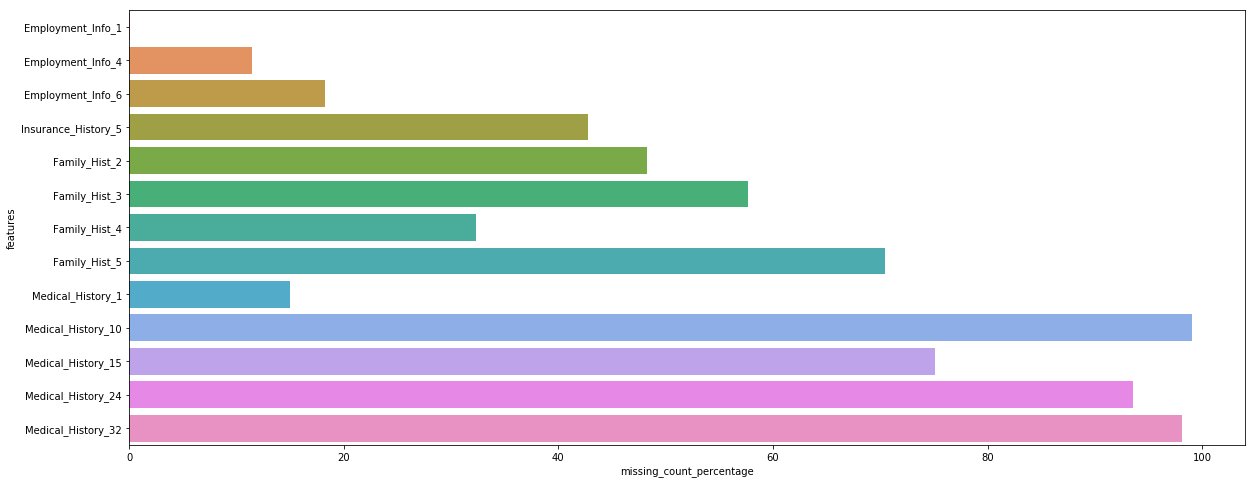

In [128]:
missing= train.isnull().sum()[train.isnull().sum() !=0]
missing=pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
missing['missing_count_percentage']=((missing['missing_count'])/59381)*100
plt.figure(figsize=(20,8))
sns.barplot(y=missing['features'],x=missing['missing_count_percentage'])

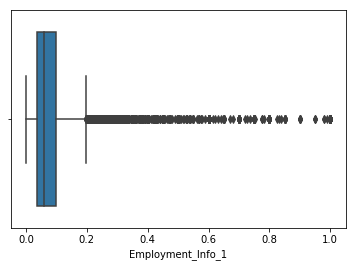

In [129]:
# Lets see spread of data before we impute missing values
plt.plot(figsize=(15,10))
sns.boxplot(train['Employment_Info_1'])
# Employment_Info_1 seems to have lots of outliers - Median should be right to impute missing values

In [130]:
train['Employment_Info_1'].isna().sum()

19

In [131]:
train['Employment_Info_1'].fillna(train['Employment_Info_1'].median(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 
test['Employment_Info_1'].fillna(test['Employment_Info_1'].median(),inplace=True)

In [132]:
train['Employment_Info_1'].isna().sum()

0

In [133]:
#Outlier Treatment -
train['Employment_Info_1'].describe()

count    59381.000000
mean         0.077576
std          0.082334
min          0.000000
25%          0.035000
50%          0.060000
75%          0.100000
max          1.000000
Name: Employment_Info_1, dtype: float64

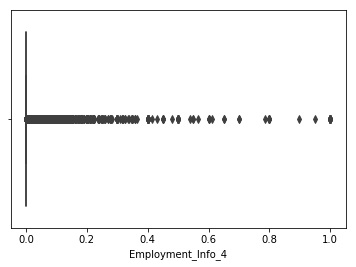

In [134]:
sns.boxplot(train['Employment_Info_4'])
# ['Employment_Info_4'] is has most of the values centered close to zero , also huge presence of outliers

In [135]:
train['Employment_Info_4'].fillna(train['Employment_Info_4'].median(),inplace=True)
test['Employment_Info_4'].fillna(test['Employment_Info_4'].median(),inplace=True)

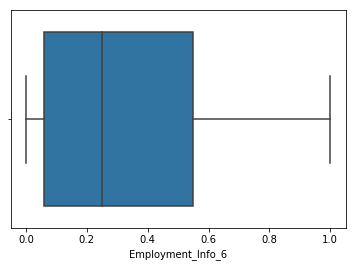

In [136]:
sns.boxplot(train['Employment_Info_6'])
#No outlieers - mean should be rigth candidate to impute missing values

In [137]:
train['Employment_Info_6'].fillna(train['Employment_Info_6'].mean(),inplace=True)
test['Employment_Info_6'].fillna(test['Employment_Info_6'].mean(),inplace=True)

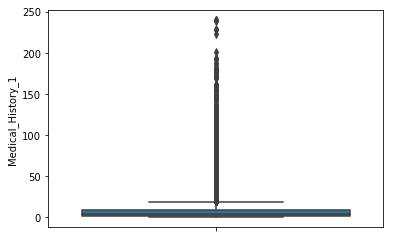

In [138]:
sns.boxplot(y=train['Medical_History_1'])

In [139]:
train['Medical_History_1'].fillna(train['Medical_History_1'].median(),inplace=True)
test['Medical_History_1'].fillna(test['Medical_History_1'].median(),inplace=True)

In [140]:
#lets drop features with high number of missing values 
train.drop(['Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32','Family_Hist_3','Family_Hist_5','Family_Hist_2','Family_Hist_4'],axis=1,inplace=True)

In [141]:
test.drop(['Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32','Family_Hist_3','Family_Hist_5','Family_Hist_2','Family_Hist_4'],axis=1,inplace=True)

In [142]:
#imputing with median 
train['Insurance_History_5'].fillna(train['Insurance_History_5'].median(),inplace=True)
test['Insurance_History_5'].fillna(test['Insurance_History_5'].median(),inplace=True)

In [143]:
le=LabelEncoder()
train['Product_Info_2']=le.fit_transform(train['Product_Info_2'])
test['Product_Info_2']=le.transform(test['Product_Info_2'])

In [144]:
test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,16,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,16,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,0,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,0,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [152]:
y = train['Response'].values
x = train.drop(columns = ['Response','Id'])
# feature meatrix and response vector seperation

In [156]:
y

array([8, 4, 8, ..., 8, 8, 7], dtype=int64)

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [163]:
xgc = XGBClassifier()
xgc.fit(x_train,y_train)
xgpreds = xgc.predict(x_test)
metrics.accuracy_score(y_test, xgpreds)

0.5469394628273133

In [166]:
print(confusion_matrix(y_test,xgpreds))

[[ 321  207    8    6   92  250  114  196]
 [ 163  364   13   18  127  278  103  234]
 [  12   15   12    8   50   84    3   14]
 [   5    6    2   40    0  127   11  110]
 [  56  103   19    5  557  205   53  104]
 [ 131  101    6   19   99 1125  249  477]
 [  55   30    2   12   13  315  595  580]
 [  33   19    1   21    7  265  145 3482]]
